In [1]:
import os
import numpy as np
import pylab as plt
import numpy as np, functools as func

from sklearn.tree import DecisionTreeRegressor
from sklearn.datasets import make_moons
from matplotlib.colors import ListedColormap

%matplotlib inline

<p align="center">
  <img src="https://raw.githubusercontent.com/senya-ashukha/simple-boosting/master/the_idea.png"/>
</p>

In [2]:


cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

def plot_surface(X, y, clf):
    h = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 8))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

In [3]:
class BinaryBoostingClassifier:
    def __init__(self, n_estimators, lr):
        self.lr = lr  
        self.n_est = n_estimators
        
    def fit(self, X, y):
        self.ens = [] 
        for i in range(self.n_est):
            # Eval the gradients dL(y, y_pred)/dy_pred for L2-loss 
            # L2-loss is not the best choice for classification but the simplest one :) 
            # Try CrossEntopy as an assignment!
            grad = y - self._predict(X) 
            # Fit the next estimator to predict **gradients**. 
            # This is the regression problem. 
            estimator = DecisionTreeRegressor(max_depth=3).fit(X, grad) 
            self.ens.append(estimator) # Append the estimator to ensemble 
        return self
    
    def _predict(self, X):
        # initial approximation of y_pred by zero predictions
        if len(self.ens) == 0: return np.zeros(len(X)) 
        else: return func.reduce(lambda a, b: a+b, [self.lr * e.predict(X) for e in self.ens]) 
        
    def predict(self, X):
        return np.array(self._predict(X) > 0.5).astype(int)

In [4]:
X_train, y_train = make_moons(n_samples=1000, noise=0.1)
X_test, y_test = make_moons(n_samples=1000, noise=0.1)
clf = BinaryBoostingClassifier(n_estimators=500, lr=0.01).fit(X_train, y_train)

In [5]:
print('Accuarcy Train = ', (clf.predict(X_train) == y_train).mean())
print('Accuarcy Test = ',  (clf.predict(X_test) == y_test).mean())

Accuarcy Train =  0.995
Accuarcy Test =  0.99


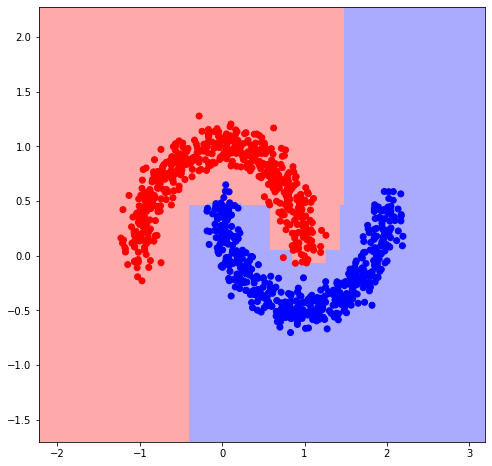

In [6]:
plot_surface(X_train, y_train, clf)